In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Mestrado/sentiment analysis/preprocessing.csv')

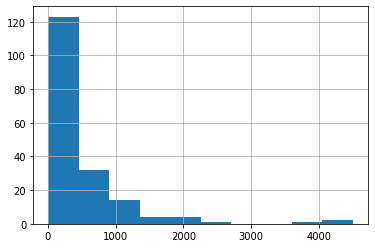

In [6]:
df['text_corrected'].str.len().hist()

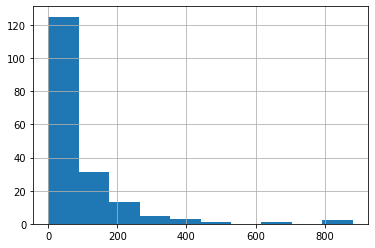

In [7]:
df['text_corrected'].str.split().\
    map(lambda x: len(x)).\
    hist()


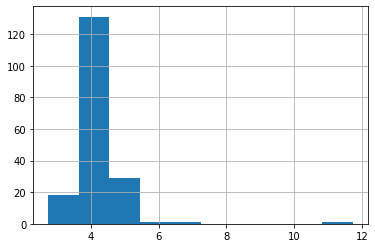

In [9]:
df['text_corrected'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df['text_corrected'].str.split().values

array([list(['Hello!', 'I', 'am', 'brazilian', 'and', 'I', 'am', 'y/o.', 'My', 'life', 'is', 'ruined.', 'I', 'al', 'had', 'a', 'great', 'stomach,', 'I', 'do', 'not', 'thro', 'since', 'I', 'was', 'like', 'years', 'old', 'I', 'think,', 'and', 'since', 'I', 'can', 'remember', 'I', 'have', 'al', 'been', 'afraid', 'of', 'vomiting', 'too.', 'I', 'started', 'to', 'feel', 'sick', 'years', 'ago,', 'december', 'I', 'was', 'living', 'in', 'the', 'States,', 'I', 'started', 'to', 'feel', 'dizzy', 'and', 'then', 'nauseous.', 'At', 'first,', 'it', 'was', 'not', 'something', 'that', 'avoided', 'me', 'to', 'do', 'things,', 'like', 'keep', 'doing', 'the', 'regular', 'things', 'in', 'my', 'life,', 'but', 'once', 'I', 'got', 'back', 'to', 'Brazil', 'in', 'february', 'of', 'I', 'started', 'to', 'feel', 'really', 'nauseous', 'everyday,', 'then', 'really', 'dizzy,', 'sometimes', 'I', 'did', 'not', 'feel', 'nauseous', 'for', 'like', 'or', 'even', ',', 'but', 'then,', 'it', 'all', 'came', 'back.', 'I', 'to', '

In [124]:
corpus=[]
new= df['text_corrected'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [125]:
all_words = corpus

In [35]:
from operator import itemgetter
res = dict(sorted(dic.items(), key = itemgetter(1), reverse = True)[:10])

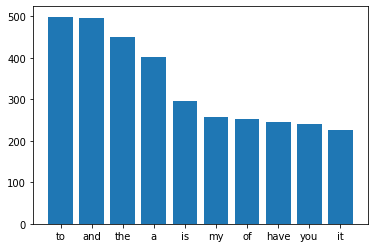

In [43]:
plt.bar(range(len(res)), list(res.values())[:10], tick_label=list(res.keys())[:10])
plt.show()

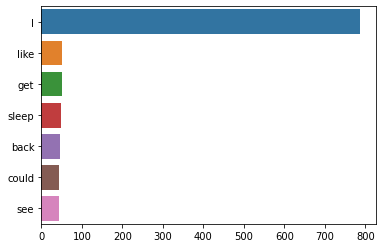

In [52]:
from collections import Counter

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most:
    if (len(x) >= 7):
        break
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [59]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

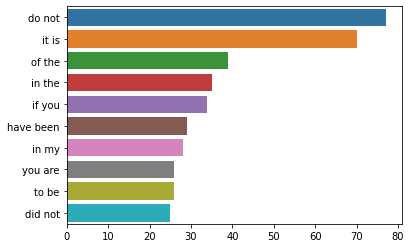

In [60]:
top_n_bigrams=get_top_ngram(df['text_corrected'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

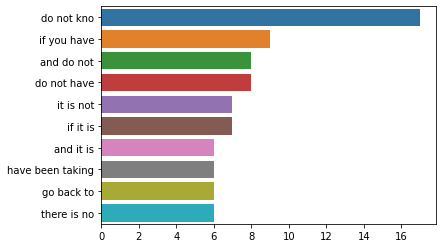

In [61]:
top_n_trigrams=get_top_ngram(df['text_corrected'],3)[:10]
x,y=map(list,zip(*top_n_trigrams))
sns.barplot(x=y,y=x)

In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['text_corrected']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [70]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.009*"get" + 0.008*"..." + 0.008*"baby" + 0.006*"The" + 0.006*"see" + 0.006*"said" + 0.006*"back" + 0.006*"period" + 0.006*"something" + 0.006*"still"'),
 (1,
  '0.007*"good" + 0.006*"time" + 0.006*"day" + 0.005*"doctor" + 0.005*"see" + 0.005*"eating" + 0.005*"still" + 0.005*"one" + 0.005*"month" + 0.004*"need"'),
 (2,
  '0.016*"sleep" + 0.010*"day" + 0.010*"doctor" + 0.006*"also" + 0.005*"good" + 0.005*"year" + 0.005*"hour" + 0.004*"night" + 0.004*"get" + 0.004*"symptom"'),
 (3,
  '0.009*"like" + 0.009*"back" + 0.008*"help" + 0.007*"year" + 0.007*"problem" + 0.007*"feel" + 0.006*"kno" + 0.006*"even" + 0.006*"really" + 0.006*"could"')]

In [74]:
pip install pyldavis

In [83]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.034121  0.099579       1        1  29.683507
2      0.102886 -0.025723       2        1  26.057691
0     -0.076317 -0.078719       3        1  23.336060
1      0.007552  0.004863       4        1  20.922741, topic_info=        Term       Freq      Total Category  logprob  loglift
313    sleep  47.000000  47.000000  Default  30.0000  30.0000
1121    baby  24.000000  24.000000  Default  29.0000  29.0000
556   period  12.000000  12.000000  Default  28.0000  28.0000
63    eating  16.000000  16.000000  Default  27.0000  27.0000
1692    Endo   7.000000   7.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
313    sleep   5.844525  47.939323   Topic4  -5.6616  -0.5401
97      help   5.590532  41.797940   Topic4  -5.7060  -0.4474
88       get   5.545431  42.961857   Topic4  -5.7141  -0.4830
30      back   5.512569  43.397564   Topic4  -5.7201  -0.4990
617     pain   5.179690  27.177231   Topic4  -5.7824  -0.0933

[298 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
272       1  0.222118       ...
272       2  0.126924       ...
272       3  0.507697       ...
272       4  0.126924       ...
2517      2  0.794257  Adderall
...     ...       ...       ...
319       4  0.448986     using
212       1  0.407226      year
212       2  0.263499      year
212       3  0.167681      year
212       4  0.167681      year

[436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [86]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [87]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-05-15 10:39:39--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-05-15 10:39:39--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  43.8MB/s    in 0.4s    

2022-05-15 10:39:39 (43.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [88]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim import similarities

import os.path
import re
import glob

import nltk
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
corpus_path = 'transcripts' # you need to change this path to the directory containing your corpus of .txt files

In [91]:
tweets = df['text_corrected'].values.tolist()

# Turn the list of string into a list of tokens
tweets = [t.split(',') for t in tweets]

In [96]:
from gensim.corpora import Dictionary
id2word = Dictionary(tweets)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tweets]

In [101]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from pprint import pprint

In [102]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*" I also had bad headache" + 0.005*" aggression and total humiliation '
  'he said I needed to see a psychiatrist! That its psychological! I am a '
  'nurse myself and am very a of the symptoms of depression and I am a very '
  'positive active person and was so shocked and upset his treatment of me" + '
  '0.005*" I am and have gone from running dance lessons and being very '
  'active" + 0.005*"Hi I really appreciate some support and ideas" + 0.005*" I '
  'was un back in April kept losing my balance" + 0.005*" numbness" + 0.005*" '
  'I was referred to a neurologist I was subject to rudeness" + 0.005*" I was '
  'seen by a different consultant in August and diagnosed M.E. but these neuro '
  'symptoms on one side are not classic M.E. my sing reflex is also not so '
  'good" + 0.005*" I had urgent MRI of the brain as they concerned about ms" + '
  '0.005*" I have still not had an EMG as I continue to have left sided ss"'),
 (1,
  '0.021*"Hello" + 0.011*"Yes i am very ex

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [103]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\\nCoherence Score: ', coherence_lda)

\nCoherence Score:  0.5144289996418536


In [107]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=tweets, start=2, limit=10, step=1)

# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

In [108]:
coherence_values

[0.5929425781533988,
 0.5610457041787181,
 0.565818675093456,
 0.5471489161938371,
 0.5500011209349825,
 0.5406822573873743,
 0.5371144407709205,
 0.5442996459259083]

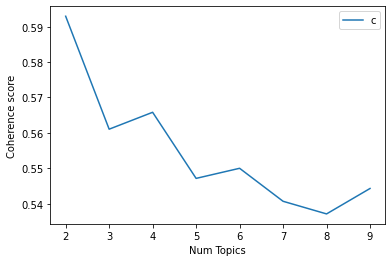

In [109]:
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [117]:
best_result_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[best_result_index]
# Select the model and print the topics
model_topics = optimal_model.show_topics(formatted=False)
print(f'''The {x[best_result_index]} topics gives the highest coherence score \\
of {coherence_values[best_result_index]}''')

The 2 topics gives the highest coherence score \of 0.5929425781533988


<input>:5: DeprecationWarning: invalid escape sequence \o
<ipython-input-117-9306d0d39d71>:5: DeprecationWarning: invalid escape sequence \o
  print(f'''The {x[best_result_index]} topics gives the highest coherence score \of {coherence_values[best_result_index]}''')


In [118]:
def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(optimal_model)

In [123]:
pyLDAvis.enable_notebook()
#p = gensimvis.prepare(optimal_model, corpus, id2word)
#p

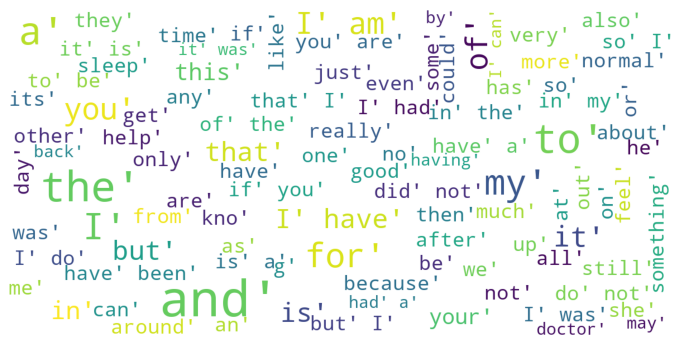

In [126]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(all_words)

In [128]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [129]:
import spacy

nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [130]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


[('India', 'GPE'),
 ('Iran', 'GPE'),
 ('Chabahar', 'PERSON'),
 ('Thursday', 'DATE')]

In [133]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
